In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
df=pd.read_csv("Salary Data.csv")
df.info()
df=df.dropna()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


In [3]:
discrete=["Gender","Education Level"]
a=pd.get_dummies(df[discrete],dtype=np.int64)
a

,Gender_Female,Gender_Male,Education Level_Bachelor's,Education Level_Master's,Education Level_PhD
0,0,1,1,0,0
1,1,0,0,1,0
2,0,1,0,0,1
3,1,0,1,0,0
4,0,1,0,1,0
...,...,...,...,...,...
370,1,0,1,0,0
371,0,1,0,1,0
372,1,0,1,0,0
373,0,1,1,0,0


In [4]:
df=pd.concat([df,a],axis=1)
df=df.drop(discrete,axis=1)
df

,Age,Job Title,Years of Experience,Salary,Gender_Female,Gender_Male,Education Level_Bachelor's,Education Level_Master's,Education Level_PhD
0,32.0,Software Engineer,5.0,90000.0,0,1,1,0,0
1,28.0,Data Analyst,3.0,65000.0,1,0,0,1,0
2,45.0,Senior Manager,15.0,150000.0,0,1,0,0,1
3,36.0,Sales Associate,7.0,60000.0,1,0,1,0,0
4,52.0,Director,20.0,200000.0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...
370,35.0,Senior Marketing Analyst,8.0,85000.0,1,0,1,0,0
371,43.0,Director of Operations,19.0,170000.0,0,1,0,1,0
372,29.0,Junior Project Manager,2.0,40000.0,1,0,1,0,0
373,34.0,Senior Operations Coordinator,7.0,90000.0,0,1,1,0,0


In [5]:
from sklearn.preprocessing import LabelEncoder

In [6]:
label=LabelEncoder()

In [7]:
df['Job Title']=df[['Job Title']].apply(label.fit_transform)

In [8]:
df

,Age,Job Title,Years of Experience,Salary,Gender_Female,Gender_Male,Education Level_Bachelor's,Education Level_Master's,Education Level_PhD
0,32.0,159,5.0,90000.0,0,1,1,0,0
1,28.0,17,3.0,65000.0,1,0,0,1,0
2,45.0,130,15.0,150000.0,0,1,0,0,1
3,36.0,101,7.0,60000.0,1,0,1,0,0
4,52.0,22,20.0,200000.0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...
370,35.0,131,8.0,85000.0,1,0,1,0,0
371,43.0,30,19.0,170000.0,0,1,0,1,0
372,29.0,70,2.0,40000.0,1,0,1,0,0
373,34.0,137,7.0,90000.0,0,1,1,0,0


<Axes: >

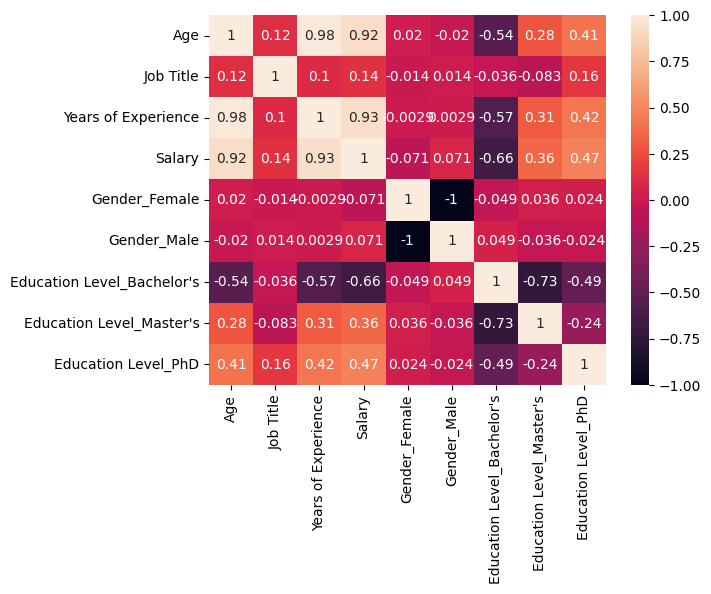

In [9]:
sns.heatmap(df.corr(),annot=True)

In [10]:
x=df.drop('Salary',axis=1)
x

,Age,Job Title,Years of Experience,Gender_Female,Gender_Male,Education Level_Bachelor's,Education Level_Master's,Education Level_PhD
0,32.0,159,5.0,0,1,1,0,0
1,28.0,17,3.0,1,0,0,1,0
2,45.0,130,15.0,0,1,0,0,1
3,36.0,101,7.0,1,0,1,0,0
4,52.0,22,20.0,0,1,0,1,0
...,...,...,...,...,...,...,...,...
370,35.0,131,8.0,1,0,1,0,0
371,43.0,30,19.0,0,1,0,1,0
372,29.0,70,2.0,1,0,1,0,0
373,34.0,137,7.0,0,1,1,0,0


In [11]:
y=df['Salary']
y

0       90000.0
1       65000.0
2      150000.0
3       60000.0
4      200000.0
         ...   
370     85000.0
371    170000.0
372     40000.0
373     90000.0
374    150000.0
Name: Salary, Length: 373, dtype: float64

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=12)

In [14]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier(criterion='entropy',max_depth=4)

In [15]:
clf=clf.fit(x_train,y_train)
prediction=clf.predict(x_test)

C:\Users\91961\anaconda3\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\91961\anaconda3\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


In [16]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn import metrics

In [17]:
r2=r2_score(y_test,prediction)*100
r2

72.2490931076179

In [18]:
#Actual Vs Predicted
df2=pd.DataFrame({"Actual":y_test,"Predicted":prediction})
df2

,Actual,Predicted
269,110000.0,120000.0
1,65000.0,50000.0
71,70000.0,120000.0
78,180000.0,160000.0
21,190000.0,160000.0
...,...,...
90,120000.0,120000.0
305,95000.0,90000.0
256,100000.0,85000.0
367,150000.0,130000.0
